In [ ]:
import rasterio

In [ ]:
"../orthoimages/swissimage-dop10_2021_2599-1200_0.1_2056.tif"

In [6]:
import os
import rasterio

def split_tif(input_file, output_dir):
    # Open the input .tif file
    with rasterio.open(input_file) as src:
        # Iterate over each band in the file
        for band_index in range(src.count):
            # Read the band data
            band = src.read(band_index + 1)

            # Create a new .tif file name for the band
            band_file = os.path.join(output_dir, f"band{band_index+1}.tif")

            # Get the metadata for the band
            band_meta = src.meta.copy()

            # Update the metadata to write the band as a separate file
            band_meta.update(count=1)

            # Write the band to a new .tif file
            with rasterio.open(band_file, 'w', **band_meta) as dst:
                dst.write(band, 1)

            print(f"Band {band_index+1} saved as {band_file}.")

    print("Splitting complete.")

# Usage
input_file = '../orthoimages/swissimage-dop10_2021_2599-1200_0.1_2056.tif'
output_dir = '../orthoimages/splitted'

split_tif(input_file, output_dir)


Band 1 saved as ../orthoimages/splitted/band1.tif.
Band 2 saved as ../orthoimages/splitted/band2.tif.
Band 3 saved as ../orthoimages/splitted/band3.tif.
Splitting complete.


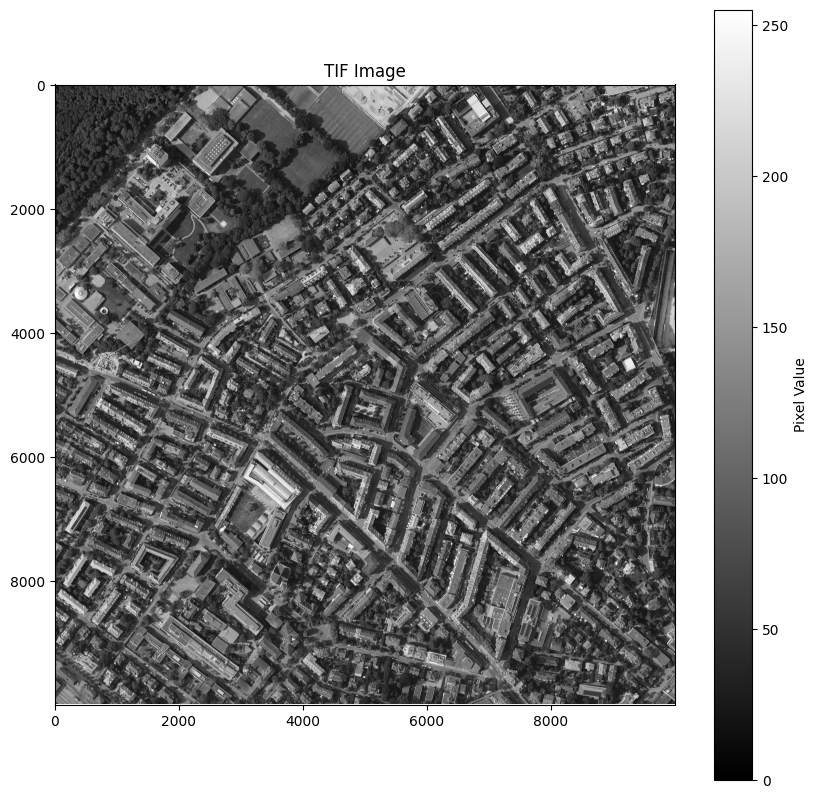

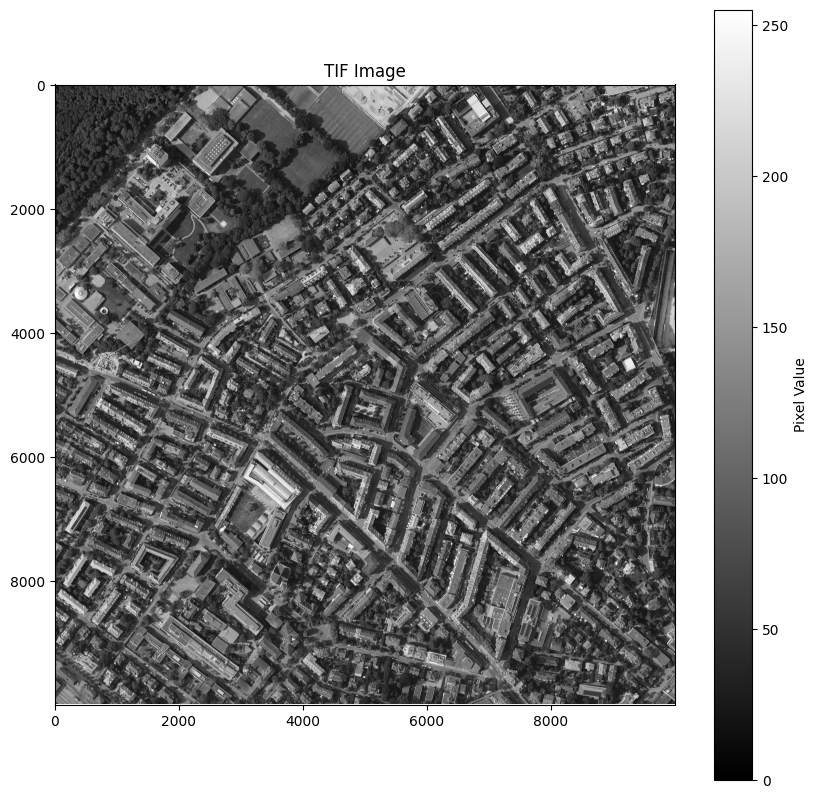

In [4]:
import matplotlib.pyplot as plt
import rasterio
import matplotlib.pyplot as plt

def plot_tif(tif_file):
    # Open the .tif file
    with rasterio.open(tif_file) as src:
        # Read the first band
        band = src.read(1)

        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(band, cmap='gray')
        plt.colorbar(label='Pixel Value')
        plt.title('TIF Image')
        plt.show()

# Usage
plot_tif(input_file)
